# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
output_data_file

'../output_data/cities.csv'

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


653

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
#url on where to pull the data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# print(query_url)

#create empty lists
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
lng = []
town = []
counter = 1


print("Beginning Data Retrieval")
print("-"*40)
# Loop through the list of cities and perform a request for data on each

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        town.append(city)
        print(f"Processing Record {counter} | {city}")
        counter +=1      
    except:
        print("City not found....skipping")
              
print("-"*40)     
print("Data Retrieval Complete")
print("-"*40)               

Beginning Data Retrieval
----------------------------------------
Processing Record 1 | geraldton
Processing Record 2 | jamestown
Processing Record 3 | bengkulu
Processing Record 4 | puerto ayora
Processing Record 5 | rikitea
City not found....skipping
Processing Record 6 | port alfred
Processing Record 7 | busselton
Processing Record 8 | tuatapere
Processing Record 9 | kapaa
Processing Record 10 | ushuaia
Processing Record 11 | egvekinot
Processing Record 12 | waiouru
Processing Record 13 | chokurdakh
Processing Record 14 | luganville
Processing Record 15 | kavaratti
Processing Record 16 | tuktoyaktuk
Processing Record 17 | boden
Processing Record 18 | bereda
Processing Record 19 | krasnokamensk
Processing Record 20 | rincon
Processing Record 21 | chuy
Processing Record 22 | troitskoye
Processing Record 23 | zaysan
Processing Record 24 | lerwick
Processing Record 25 | hermanus
Processing Record 26 | novosil
Processing Record 27 | beloha
Processing Record 28 | mahebourg
City not found.

Processing Record 235 | enumclaw
Processing Record 236 | baruun-urt
Processing Record 237 | tiarei
Processing Record 238 | phibun mangsahan
Processing Record 239 | dubrovnik
Processing Record 240 | tolaga bay
Processing Record 241 | creel
Processing Record 242 | ceres
Processing Record 243 | alice springs
Processing Record 244 | tornio
Processing Record 245 | clyde river
Processing Record 246 | kloulklubed
Processing Record 247 | nuzvid
Processing Record 248 | mehamn
Processing Record 249 | tessalit
Processing Record 250 | riyadh
Processing Record 251 | sao lourenco do sul
Processing Record 252 | tual
Processing Record 253 | caravelas
Processing Record 254 | harper
Processing Record 255 | beringovskiy
Processing Record 256 | hobart
Processing Record 257 | carballo
Processing Record 258 | talnakh
Processing Record 259 | eyl
Processing Record 260 | stornoway
Processing Record 261 | delmiro gouveia
Processing Record 262 | isangel
Processing Record 263 | roald
Processing Record 264 | waipa

City not found....skipping
Processing Record 466 | iqaluit
Processing Record 467 | kalmunai
Processing Record 468 | hobyo
Processing Record 469 | jijiga
Processing Record 470 | quatre cocos
Processing Record 471 | mackenzie
Processing Record 472 | kwinana
City not found....skipping
City not found....skipping
Processing Record 473 | antofagasta
Processing Record 474 | mazatlan
Processing Record 475 | sorong
Processing Record 476 | luderitz
Processing Record 477 | napa
Processing Record 478 | la ronge
Processing Record 479 | osypenko
Processing Record 480 | bilokurakyne
Processing Record 481 | lasa
Processing Record 482 | omboue
Processing Record 483 | oistins
Processing Record 484 | mount isa
Processing Record 485 | nakamura
Processing Record 486 | lavrentiya
Processing Record 487 | colares
Processing Record 488 | camopi
Processing Record 489 | namibe
Processing Record 490 | hualmay
Processing Record 491 | nizhnevartovsk
Processing Record 492 | ustikolina
Processing Record 493 | meulabo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
weather_dict = {
    "City": town,
    "Lat": lat,
    "Lng": lng,
    "Max temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}


weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,geraldton,-28.77,114.60,78.80,39,0,14.99,AU,1607222860
1,jamestown,42.10,-79.24,30.00,92,90,12.75,US,1607222789
2,bengkulu,-3.80,102.27,84.11,64,100,5.41,ID,1607222860
3,puerto ayora,-0.74,-90.35,71.01,91,75,1.99,EC,1607222860
4,rikitea,-23.12,-134.97,77.43,78,3,15.08,PF,1607222860


In [25]:
weather_data.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,6.100000e+02
mean,20.946918,19.693852,51.599721,74.963934,52.749180,7.598672,1.607223e+09
std,33.631045,90.247606,26.504172,18.941497,40.725535,5.922875,6.253336e+01
min,-54.800000,-179.170000,-30.750000,15.000000,0.000000,0.180000,1.607222e+09
25%,-7.335000,-58.642500,33.800000,65.250000,5.000000,3.360000,1.607223e+09
50%,24.950000,24.665000,57.100000,79.500000,59.500000,5.820000,1.607223e+09
75%,50.100000,97.387500,74.282500,89.000000,95.000000,10.267500,1.607223e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,39.150000,1.607223e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
dry_cities = weather_data[weather_data["Humidity"]<=100]
dry_cities.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,6.100000e+02
mean,20.946918,19.693852,51.599721,74.963934,52.749180,7.598672,1.607223e+09
std,33.631045,90.247606,26.504172,18.941497,40.725535,5.922875,6.253336e+01
min,-54.800000,-179.170000,-30.750000,15.000000,0.000000,0.180000,1.607222e+09
25%,-7.335000,-58.642500,33.800000,65.250000,5.000000,3.360000,1.607223e+09
50%,24.950000,24.665000,57.100000,79.500000,59.500000,5.820000,1.607223e+09
75%,50.100000,97.387500,74.282500,89.000000,95.000000,10.267500,1.607223e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,39.150000,1.607223e+09


In [33]:
#  Get the indices of cities that have humidity over 100%.

high_humid = weather_data.index[weather_data["Humidity"]>100].tolist()

print(f"There are {len(high_humid)} cities with over 100% humidity")

There are 0 cities with over 100% humidity


In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data.drop(labels=high_humid,inplace=False)
clean_city_data.head()
clean_city_data.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,6.100000e+02
mean,20.946918,19.693852,51.599721,74.963934,52.749180,7.598672,1.607223e+09
std,33.631045,90.247606,26.504172,18.941497,40.725535,5.922875,6.253336e+01
min,-54.800000,-179.170000,-30.750000,15.000000,0.000000,0.180000,1.607222e+09
25%,-7.335000,-58.642500,33.800000,65.250000,5.000000,3.360000,1.607223e+09
50%,24.950000,24.665000,57.100000,79.500000,59.500000,5.820000,1.607223e+09
75%,50.100000,97.387500,74.282500,89.000000,95.000000,10.267500,1.607223e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,39.150000,1.607223e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

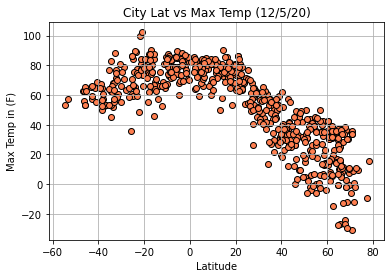

In [41]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max temp']
plt.scatter(x_values,y_values, facecolors='coral', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp in (F)')
plt.title('City Lat vs Max Temp (12/5/20)')
plt.grid()
plt.savefig("../output_data/lat_vs_temp.png")
plt.show()


## Latitude vs. Humidity Plot

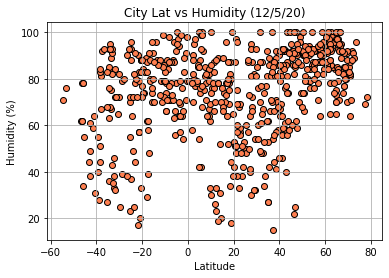

In [42]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values, facecolors='coral', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Lat vs Humidity (12/5/20)')
plt.grid()
plt.savefig("../output_data/lat_vs_humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

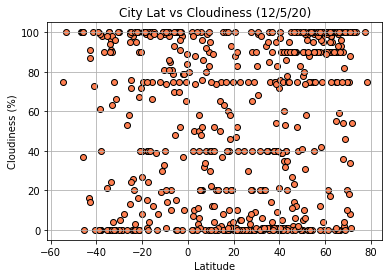

In [43]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values, facecolors='coral', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Lat vs Cloudiness (12/5/20)')
plt.grid()
plt.savefig("../output_data/lat_vs_cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

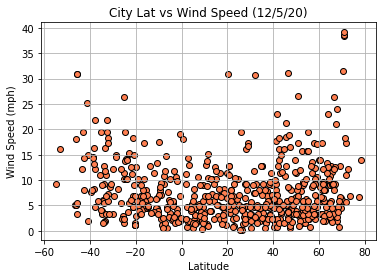

In [44]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values, facecolors='coral', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Lat vs Wind Speed (12/5/20)')
plt.grid()
plt.savefig("../output_data/lat_vs_wind_speed.png")
plt.show()


## Linear Regression

In [53]:
northern_df = clean_city_data[clean_city_data["Lat"]>0]

southern_df = clean_city_data[clean_city_data["Lat"]<0]

print(f"There are {northern_df.City.count()} cities in the northern hemisphere")
print(f"There are {southern_df.City.count()} cities in the southern hemisphere")

There are 426 cities in the northern hemisphere
There are 184 cities in the southern hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7362340607773841


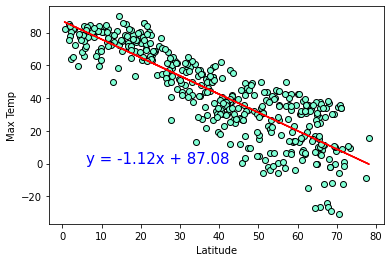

In [59]:
x_values = northern_df['Lat']
y_values = northern_df['Max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='aquamarine', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3025092428839063


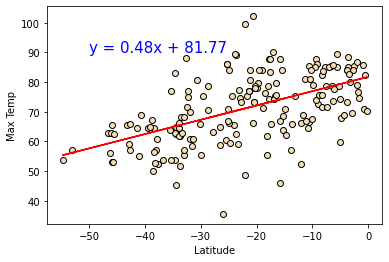

In [61]:
x_values = southern_df['Lat']
y_values = southern_df['Max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='wheat', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


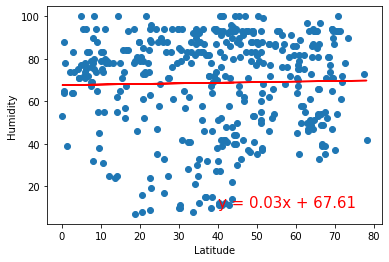

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


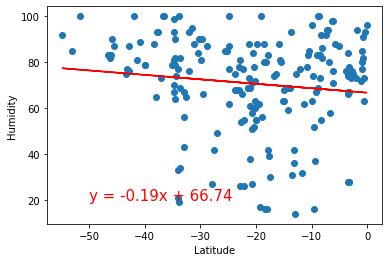

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


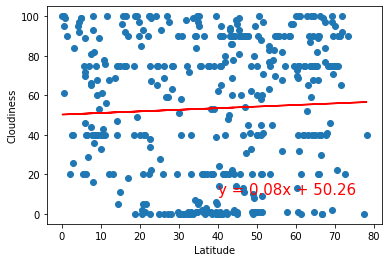

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


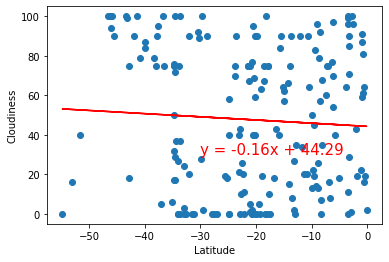

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


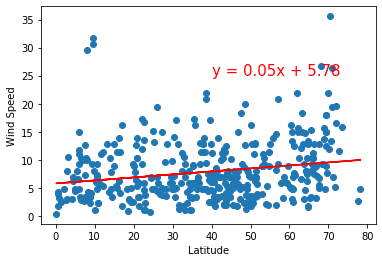

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


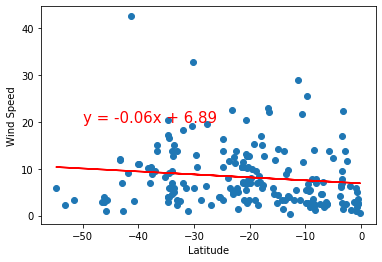